In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

I have three "cuts" of the data that I want to perform machine learning on:

- all the usable data (i.e. excluding entries that don't have reports)

- the "Auburn" cut, which should remove Vultology reports from authors that have 5 or fewer reports (since they are less experienced)

- the "Lapiz" cut, layered over the Auburn cut, which should take into account this analysis:
"I'm seeing something rather suspicious in the data. If I calculate P-axis coordinates with the formula (Suspended - Grounded )/(Suspended + Grounded ), which ranges from -1 (completely Grounded) to +1 (completely Suspended), then there are 90 samples with -1, i.e., Grounded with zero signal mixing.  However, there are only 8 samples in the (-1, -0.9] interval.  In the (-0.9, 0.8] interval there are 40 samples. IMO that strongly suggests that many of those Grounded samples with zero P-axis signal mixing have neglected Suspended signals. The other end of the spectrum also looks suspicious, though it's less extreme. 
There are 36 samples with P-axis coordinates of 1 (Suspended with zero signal mixing), only 3 samples in the [0.9, 1) interval, but 26 samples in the [0.8, 0.9) interval. As for J-axis coordinates, (Measured - Candid)/(Measured + Candid), there are 55 samples with coordinates of 1 (Measured with zero signal mixing), 23 samples in the [0.9, 1) interval, and 35 in the [0.8, 0.9) interval.  There's still an odd dip, but it's a lot less suspicious. At the other end, there are 23 samples with -1 (Candid with zero signal mixing), 12 samples in the (-1, -0.9] interval and 18 samples in the (-0.9, -0.8] interval. It might be worth repeating the statistical analysis reported earlier in this channel just on samples in the (-0.9, 0.9) intervals."

We will see if these different versions of the data give different statistical results or different results in machine learning algorithms.

## Statistics on all usable data

In [2]:
all_df = pd.read_csv("Vultology_Database_2024-02-24_-_PlusAuthors.csv")
all_df.head()

,Post Title,Unnamed: 1,Bio,Video URL,Video 2 URL,Video 3 URL,GIF Breakdown,Status,Type,Development,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,Cœur de Pirate,Miriam Greenfield,"Cœur de Pirate, born Béatrice Martin, is a Can...",https://www.youtube.com/watch?v=w3jpQhJzxNE,https://www.youtube.com/watch?v=uYLTMlPMy4s,https://www.youtube.com/watch?v=SH_tFK3jxJk,https://docs.google.com/document/d/1CiJP3tFJKM...,NaN,sefi,iii-,...,4.0,4.0,2.0,2.0,4.0,2.0,2.0,2.0,NaN,2.0
1,Michael Gervais,Calin Copil,Michael Gervais is a renowned high-performance...,https://www.youtube.com/watch?v=TYudsPrEGjg,https://www.youtube.com/watch?v=vjnN3O-xVuQ,https://www.youtube.com/watch?v=BtS2w6XRKrY,https://docs.google.com/document/d/1255Wg_3MzT...,NaN,fesi,i---,...,2.0,2.0,NaN,NaN,4.0,4.0,2.0,2.0,4.0,2.0
2,Joan Jett,Calin Copil,"Joan Jett is an American rock singer, songwrit...",https://www.youtube.com/watch?v=v0NQ8dcbepo,https://www.youtube.com/watch?v=EhqzgK2LlMU,https://www.youtube.com/watch?v=zdRQL3IzeAE,https://docs.google.com/document/d/1MF6soq6Wzo...,NaN,seti,i-i-,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,4.0,4.0
3,Ben Stein,Calin Copil,"Ben Stein is a versatile American figure, reco...",https://www.youtube.com/watch?si=ZdVV_C_6CE_rM...,https://www.youtube.com/watch?v=EYTTkenu60Y,NaN,https://docs.google.com/document/d/1ruWJyybgtG...,NaN,site,i---,...,2.0,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,2.0
4,Billie Joe Armstrong,Peter Foy,"Billy Joe Armstrong, the frontman of the punk ...",https://www.youtube.com/watch?v=Y34ZvyN1Bjk&t,https://www.youtube.com/watch?v=RwWUqlh2oMU&t,https://www.youtube.com/watch?v=a5HctK656Hk,NaN,NaN,fise,ii-i,...,2.0,2.0,NaN,0.0,2.0,4.0,2.0,4.0,2.0,4.0


In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 91 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Post Title                     1059 non-null   object 
 1   Unnamed: 1                     1059 non-null   object 
 2   Bio                            330 non-null    object 
 3   Video URL                      1059 non-null   object 
 4   Video 2 URL                    325 non-null    object 
 5   Video 3 URL                    286 non-null    object 
 6   GIF Breakdown                  177 non-null    object 
 7   Status                         559 non-null    object 
 8   Type                           1059 non-null   object 
 9   Development                    1059 non-null   object 
 10  Emotions                       1059 non-null   object 
 11  Fallen Affect                  549 non-null    object 
 12  J Signal Mixing                291 non-null    o

I need to understand what all of these columns mean so that I know if I will need them.

- Post Title: name
- Unnamed: 1 refers to the author of the Vultology report (which will be needed for the Auburn cut)
- Bio: not needed for now
- Video urls and GIF breakdown: not needed for now

I don't know what Status is in this context, so let's start making a list of unneeded columns and explore Status

In [4]:
unneeded = ['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown']
unneeded

['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown']

In [5]:
all_df['Status'].value_counts()

publish          551
peer_reviewed      5
pending            3
Name: Status, dtype: int64

Considering that a lot of those values are NaN, and most of the rest have the unclear designation "Publish", I doubt this is a meaningful feature, since technically all of these should be peer reviewed before being published anyways (thus the distinction between those two is muddled)

We will certainly need type and development. Let's look at more of the columns:

In [6]:
unneeded.append('Status')
unneeded

['Bio', 'Video URL', 'Video 2 URL', 'Video 3 URL', 'GIF Breakdown', 'Status']

In [7]:
all_df.iloc[:, 10:].head()

,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Alternative,Sex,Age Range,Geography,Ethnicity,Checkbox,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,seelie,0,low,medium,SeFi II-,female,1980s,north_america,white/european,NaN,...,4.0,4.0,2.0,2.0,4.0,2.0,2.0,2.0,NaN,2.0
1,neutral,1,low,low,II--,male,-1,north_america,white/european,NaN,...,2.0,2.0,NaN,NaN,4.0,4.0,2.0,2.0,4.0,2.0
2,directive,2,low,low,NaN,female,1950s,north_america,white/european,NaN,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,4.0,4.0
3,unseelie,2,low,low,NaN,male,1940s,north_america,jewish,NaN,...,2.0,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,2.0
4,neutral,0,low,medium,Appears II-- in younger years,male,1970s,north_america,white/european,NaN,...,2.0,2.0,NaN,0.0,2.0,4.0,2.0,4.0,2.0,4.0


We will need emotions (but might just prefer to divide it into guarded vs unguarded, can also include neutral)

We will need Fallen affect

Signal mixing would be good information to have as we may want to focus on samples with or without it

Alternative is probably unnecessary since we have the raw signal data

Sex is useful information to look for systematic differences

Age range, geography and ethnicity could be useful information for cross-sectional analysis

I have no idea what Checkbox is, so let's explore it

In [8]:
unneeded.append('Alternative')
unneeded

['Bio',
 'Video URL',
 'Video 2 URL',
 'Video 3 URL',
 'GIF Breakdown',
 'Status',
 'Alternative']

In [9]:
all_df['Checkbox'].value_counts()

Series([], Name: Checkbox, dtype: int64)

The entire thing is null so we'll be removing it

In [10]:
unneeded.append('Checkbox')
unneeded

['Bio',
 'Video URL',
 'Video 2 URL',
 'Video 3 URL',
 'GIF Breakdown',
 'Status',
 'Alternative',
 'Checkbox']

In [11]:
all_df.iloc[:, 20:].head()

,Checkbox 1,R1 Rigid Posture Copy,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
0,peter_j._foy | sierra_rose | miriam_greenfield,4.0,2.0,4.0,2.0,NaN,4.0,4.0,2.0,4.0,...,4.0,4.0,2.0,2.0,4.0,2.0,2.0,2.0,NaN,2.0
1,juan_e._sandoval | calin_copil | ash_rose,7.0,7.0,7.0,7.0,4.0,NaN,NaN,2.0,4.0,...,2.0,2.0,NaN,NaN,4.0,4.0,2.0,2.0,4.0,2.0
2,juan_e._sandoval | calin_copil | ash_rose | pe...,2.0,2.0,4.0,4.0,NaN,4.0,7.0,2.0,7.0,...,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,4.0,4.0
3,juan_e._sandoval | calin_copil | sierra_rose,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,...,2.0,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.0,2.0
4,ash_rose | jacquelyn_scott | peter_j._foy | si...,4.0,7.0,2.0,4.0,4.0,4.0,NaN,2.0,2.0,...,2.0,2.0,NaN,0.0,2.0,4.0,2.0,4.0,2.0,4.0


Checkbox 1 includes all Vultologists that participated in peer reviewing the sample, but this information does not seem necessary for our purpose

After that we have bonafide vultology signals, in which NaN should be replaced with 0. R1 also does not need to include "Copy" in its name

In [12]:
unneeded.append('Checkbox 1')
unneeded

['Bio',
 'Video URL',
 'Video 2 URL',
 'Video 3 URL',
 'GIF Breakdown',
 'Status',
 'Alternative',
 'Checkbox',
 'Checkbox 1']

In [13]:
all_df.drop(labels=unneeded, axis=1, inplace=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Post Title                     1059 non-null   object 
 1   Unnamed: 1                     1059 non-null   object 
 2   Type                           1059 non-null   object 
 3   Development                    1059 non-null   object 
 4   Emotions                       1059 non-null   object 
 5   Fallen Affect                  549 non-null    object 
 6   J Signal Mixing                291 non-null    object 
 7   P Signal Mixing                290 non-null    object 
 8   Sex                            1059 non-null   object 
 9   Age Range                      583 non-null    object 
 10  Geography                      583 non-null    object 
 11  Ethnicity                      583 non-null    object 
 12  R1 Rigid Posture Copy          355 non-null    f

Now we need to fill each column appropriately:
- Post Title should be changed to Sample Name
- Unnamed should be changed to Vultologist
- Copy should be removed from the R1 signal name
- Emotions should just be Guarded, Unguarded and Neutral
- Fallen Affect should have just 6 numerical values between 0 and 5, rather than being a string
- NaN values in all Vultology signals (including Fallen Affect) should be replaced with 0

In [14]:
all_columns = list(all_df.columns)
all_columns[0] = 'Sample Name'
all_columns[1] = 'Vultologist'
all_columns[12] = 'R1 Rigid Posture'
all_df.columns = all_columns
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1059 non-null   object 
 1   Vultologist                    1059 non-null   object 
 2   Type                           1059 non-null   object 
 3   Development                    1059 non-null   object 
 4   Emotions                       1059 non-null   object 
 5   Fallen Affect                  549 non-null    object 
 6   J Signal Mixing                291 non-null    object 
 7   P Signal Mixing                290 non-null    object 
 8   Sex                            1059 non-null   object 
 9   Age Range                      583 non-null    object 
 10  Geography                      583 non-null    object 
 11  Ethnicity                      583 non-null    object 
 12  R1 Rigid Posture               355 non-null    f

In [15]:
all_df.loc[:, "Emotions"] = all_df.loc[:, "Emotions"].replace({"unseelie": "guarded", "adaptive": "unguarded", "directive": "guarded", "seelie": "unguarded"})
all_df['Emotions'].value_counts()

guarded      525
unguarded    494
neutral       40
Name: Emotions, dtype: int64

In [16]:
all_df['Fallen Affect'].value_counts()

0      245
1      111
2      105
3       79
4        5
5        3
No`      1
Name: Fallen Affect, dtype: int64

In [17]:
all_df.loc[:, "Fallen Affect"] = all_df.loc[:, "Fallen Affect"].replace('No`', 0)
all_df['Fallen Affect'].value_counts()

0    245
1    111
2    105
3     79
4      5
5      3
0      1
Name: Fallen Affect, dtype: int64

In [18]:
all_df['Fallen Affect'] = all_df['Fallen Affect'].astype('float')
all_df['Fallen Affect'].value_counts()

0.0    246
1.0    111
2.0    105
3.0     79
4.0      5
5.0      3
Name: Fallen Affect, dtype: int64

In [19]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1059 non-null   object 
 1   Vultologist                    1059 non-null   object 
 2   Type                           1059 non-null   object 
 3   Development                    1059 non-null   object 
 4   Emotions                       1059 non-null   object 
 5   Fallen Affect                  549 non-null    float64
 6   J Signal Mixing                291 non-null    object 
 7   P Signal Mixing                290 non-null    object 
 8   Sex                            1059 non-null   object 
 9   Age Range                      583 non-null    object 
 10  Geography                      583 non-null    object 
 11  Ethnicity                      583 non-null    object 
 12  R1 Rigid Posture               355 non-null    f

In [20]:
all_df.iloc[:, 5] = all_df.iloc[:, 5].fillna(0)
all_df.iloc[:, 12:] = all_df.iloc[:, 12:].fillna(0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Name                    1059 non-null   object 
 1   Vultologist                    1059 non-null   object 
 2   Type                           1059 non-null   object 
 3   Development                    1059 non-null   object 
 4   Emotions                       1059 non-null   object 
 5   Fallen Affect                  1059 non-null   float64
 6   J Signal Mixing                291 non-null    object 
 7   P Signal Mixing                290 non-null    object 
 8   Sex                            1059 non-null   object 
 9   Age Range                      583 non-null    object 
 10  Geography                      583 non-null    object 
 11  Ethnicity                      583 non-null    object 
 12  R1 Rigid Posture               1059 non-null   f

At this point, the data should be workable enough to examine its distributions

In [21]:
all_df.describe()

,Fallen Affect,R1 Rigid Posture,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,...,SU5 Brushstrokes Eye Toggles,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,...,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.559962,1.395656,1.409821,1.444759,1.482531,0.860246,1.566572,1.574127,1.427762,1.555241,...,0.874410,0.389046,0.704438,0.417375,0.959396,1.305949,0.673277,0.544854,0.780925,1.057602
std,1.003276,2.401012,2.361101,2.201460,2.250483,1.957805,2.428185,2.487954,2.105269,2.272029,...,1.802198,1.062202,1.600003,1.280034,1.689860,2.039513,1.492563,1.308912,1.648501,1.862851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,2.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Right away you can notice that the columns have very similar numbers, but there are a lot of zeroes around even the 50 and 75 percentiles of data, which reminds me that many of these rows contains ALL zeroes because unfortunately about the half of the samples don't even have reports at all, so we need to deal with that issue to get any sense of the range of our data in the first place.

There are also too many columns for us to realistically check all of them, so we can use the transpose on this describe dataframe and then describe the ranges for the various percentages, mean and std, etc., to make sure nothing is amiss.

We'll start by investigating the sums of the rows, because some rows also have sums that aren't zero but are also very low numbers that don't make sense, so zero probably won't be the cutoff to put aside the data for now

In [22]:
all_sum = all_df.sum(axis=1)
all_sum.sort_values()

<ipython-input-22-a2deded458d4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_sum = all_df.sum(axis=1)


529      0.0
424      0.0
425      0.0
426      0.0
427      0.0
       ...  
48     245.0
11     245.0
219    249.0
144    249.0
84     255.0
Length: 1059, dtype: float64

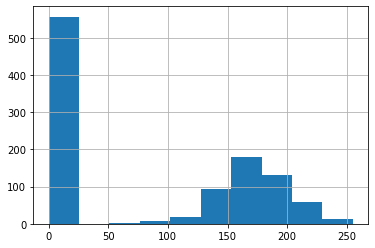

In [23]:
all_sum.hist();

The giant column of zeroes is non-useful data and there might be some small columns next to it that we can't even see

In [24]:
all_sum.sort_values().describe()

count    1059.000000
mean       81.841360
std        88.315122
min         0.000000
25%         0.000000
50%         3.000000
75%       171.000000
max       255.000000
dtype: float64

We can certainly get rid of all rows that sum to zero, then we can use the head function to investigate where any jumps to realistic report signal totals occur

In [25]:
all_df = all_df[all_sum > 0]
all_df.shape

(549, 82)

That alone wiped out 510 rows, so let's remake the sum of rows to find the cutoff point that we're going to use

In [26]:
all_sum = all_df.sum(axis=1)

all_sum.sort_values().head(30)

<ipython-input-26-1b0027dd2a16>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_sum = all_df.sum(axis=1)


1056    1.0
1052    1.0
1050    2.0
1051    2.0
1048    2.0
771     3.0
772     3.0
437     3.0
774     3.0
802     3.0
836     3.0
436     3.0
751     3.0
463     3.0
408     3.0
395     3.0
359     3.0
348     3.0
338     3.0
336     3.0
409     3.0
765     3.0
551     3.0
472     3.0
630     3.0
635     3.0
573     3.0
637     3.0
642     3.0
663     3.0
dtype: float64

That's at least 30 values that are still too low to constitute a serious report, which is kind of strange. We'll have to look at the hist again

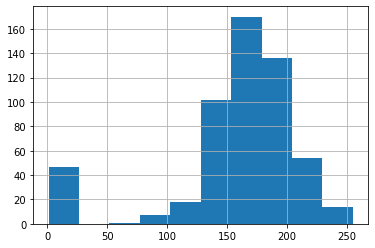

In [27]:
all_sum.hist();

It looks like we can safely consider anything below 50 as non-useful data. Let's examine the values below 50 and the values above 50 to get a closer look at the cutoff

In [28]:
all_sum[all_sum <= 50].sort_values()

1052    1.0
1056    1.0
1051    2.0
1050    2.0
1048    2.0
318     3.0
727     3.0
728     3.0
736     3.0
740     3.0
750     3.0
751     3.0
765     3.0
673     3.0
771     3.0
772     3.0
774     3.0
802     3.0
836     3.0
763     3.0
663     3.0
688     3.0
637     3.0
336     3.0
338     3.0
348     3.0
359     3.0
395     3.0
408     3.0
642     3.0
436     3.0
437     3.0
409     3.0
472     3.0
551     3.0
557     3.0
573     3.0
574     3.0
600     3.0
630     3.0
635     3.0
463     3.0
1053    5.0
1049    8.0
1055    8.0
1057    8.0
1054    9.0
dtype: float64

Not only are these below 50, they are far below, which only supports the idea that they should not be included.

In [29]:
all_sum[all_sum > 50].sort_values().head(30)

975      74.0
264      78.0
962      83.0
945      90.0
869      93.0
999      95.0
1001     97.0
1037    100.0
947     103.0
935     111.0
288     113.0
957     113.0
3       114.0
37      116.0
1040    116.0
105     117.0
201     118.0
293     118.0
960     119.0
907     122.0
93      124.0
243     125.0
197     125.0
207     126.0
870     127.0
204     127.0
256     129.0
212     130.0
273     130.0
997     131.0
dtype: float64

These are all far above 50 and follow a pretty continuous, predictable distribution, so I believe that these values fall within a sufficiently normal range to use.

So we'll just get rid of everything under 50 and add sum of signals as a column to the dataframe so we can stay organized

In [30]:
all_df = all_df[all_sum > 50]
all_df.shape

(502, 82)

We just need to check for duplicates to make sure there isn't any funny business

In [31]:
all_df.duplicated().sum()

0

There are no duplicates

In [32]:
all_df['sum'] = all_df.sum(axis=1)
all_df.describe()

<ipython-input-32-3036cfe25748>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_df['sum'] = all_df.sum(axis=1)


,Fallen Affect,R1 Rigid Posture,R2 Face Centric,R3 Punctuated Motions,R4 Vertical Movements,R5 Subordinate Fluidity,F1 Fluid Posture,F2 Eye Centric,F3 Gliding Motions,F4 Horizontal Movements,...,SU6 Eye Head Trailing Motions,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.932271,2.944223,2.910359,3.047809,3.127490,1.814741,3.304781,3.320717,3.011952,3.280876,...,0.820717,1.486056,0.880478,2.023904,2.754980,1.420319,1.149402,1.647410,2.231076,172.336653
std,1.099535,2.757837,2.657782,2.310633,2.353848,2.521671,2.587537,2.694477,2.139790,2.286556,...,1.423964,2.059689,1.746870,1.967659,2.187272,1.908230,1.709312,2.075709,2.169097,29.470378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,153.000000
50%,1.000000,2.000000,2.000000,2.000000,3.000000,0.000000,4.000000,4.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,172.000000
75%,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7.000000,4.000000,4.000000,...,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,4.000000,192.000000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,255.000000


These numbers look more sensible but there are still a surprising amount with 0 values around the median, but that could just indicate a relatively rare signal. The most frequent signals marked is an interesting topic in itself

In [33]:
all_df['sum'].describe()

count    502.000000
mean     172.336653
std       29.470378
min       74.000000
25%      153.000000
50%      172.000000
75%      192.000000
max      255.000000
Name: sum, dtype: float64

Those are the summary statistics for the number of signals marked in a vultology report, very interesting. The mean and the median are pretty close too which makes the distribution pretty balanced.

Let's look at the vultology signals with the highest and lowest means

In [34]:
all_means = all_df.drop(['sum', 'Fallen Affect'], axis=1).describe().loc['mean', :]
all_means.describe()

count    70.000000
mean      2.448634
std       0.754539
min       0.820717
25%       1.879980
50%       2.500996
75%       2.998506
max       4.127490
Name: mean, dtype: float64

This is also a very believable and balanced distribution with close mean and median.

The 10 least marked vultology signals are:

In [35]:
all_means.sort_values().head(10)

SU6 Eye Head Trailing Motions    0.820717
SU8 Quirky Skits                 0.880478
CA9 Grasping Hands               1.001992
MS9 Puppeteer Hands              1.099602
EG1 Upset Mouth Tension          1.149402
EU3 Bashful Body Movements       1.420319
CA5 Asymmetrical Smirks          1.456175
SU7 Levity Effect                1.486056
GR4 Intense Scowling             1.545817
RR3 Exerted Pushes               1.547809
Name: mean, dtype: float64

In general some of the Ne/Si signals seem rare or difficult to understand, so them being so low is interesting and believable in a sense

The top 10 most marked vultology signals:

In [36]:
all_means.sort_values(ascending=False).head(10)

PR5 Projecting Hands       4.127490
PF2 Toggling Eyes          3.729084
PR4 Fluent Articulation    3.667331
GR3 Taut Outer Edges       3.597610
PR1 Head Pushes            3.591633
PR2 Head Shakes            3.386454
PF3 Body Swaying           3.320717
F2 Eye Centric             3.320717
F1 Fluid Posture           3.304781
F4 Horizontal Movements    3.280876
Name: mean, dtype: float64

A lot of these signals are things that most people do (project their hands some, talk and articulate, look around, etc.), or are very distinctive like taut outer edges. That definitely makes sense but I wonder if a future version of the codifier will add greater nuance to these signals to distinguish them for ordinary behavior, if that's even necessary

Let's also look at std

In [37]:
all_std = all_df.drop(['sum', 'Fallen Affect'], axis=1).describe().loc['std', :]
all_std.describe()

count    70.000000
mean      2.316474
std       0.308896
min       1.423964
25%       2.147501
50%       2.348320
75%       2.542165
max       2.881809
Name: std, dtype: float64

Also a typically balanced distribution

Bottom 5 (so most unvarying signals)

In [38]:
all_std.sort_values().head(10)

SU6 Eye Head Trailing Motions    1.423964
PR3 Shoulder Shrugs              1.676575
MS9 Puppeteer Hands              1.686520
CA9 Grasping Hands               1.706509
EG1 Upset Mouth Tension          1.709312
SU8 Quirky Skits                 1.746870
RR3 Exerted Pushes               1.875545
RR4 Momentum Halting             1.877634
EU3 Bashful Body Movements       1.908230
CA5 Asymmetrical Smirks          1.932254
Name: std, dtype: float64

Interestingly, it's a lot of the same one's that had low means, so in having low values they probably have less chance to vary

In [39]:
all_std.sort_values(ascending=False).head(10)

GR3 Taut Outer Edges             2.881809
MS2 Horizontal Curtain Smiles    2.871945
GR1 Taut Preseptal Area          2.770815
R1 Rigid Posture                 2.757837
MS3 Two Point Pulling            2.700571
F2 Eye Centric                   2.694477
MS1 Lax Nasolabial Area          2.677833
MS7 Parabolic Velocity           2.668874
R2 Face Centric                  2.657782
SU1 Lax Preseptal Area           2.619692
Name: std, dtype: float64

So since these signals vary a lot, I would look at it as them being more like "you have it or you don't" (since there would be little grey area between extreme values), which makes sense for things like the tautness of eye areas and having a Measured smile and/or face, middling cases are rarer. Measured does seem particulary strong in this regard though, which is noteworthy.

The other columns of data that would be important to have and know the distributions of are:
- create a column for quadra
- create a column for lead energetic
- look at the distribution of each group of signals to see if there are any patterns

Before we calculate the scores needed to create these columns, we will reset the index of signals_df to make it a uniform RangeIndex so that it's easier to iterate through

In [40]:
all_df.reset_index(drop=True, inplace=True)
all_df.index

RangeIndex(start=0, stop=502, step=1)

In [41]:
Lead_Energetic = []

for i in range(len(all_df)):
    type = all_df['Type'][i]
    if type in ('fesi', 'feni', 'teni', 'tesi'):
        Lead_Energetic.append('Je')
    elif type in ('sife', 'nife', 'nite', 'site'):
        Lead_Energetic.append('Pi')
    elif type in ('neti', 'seti', 'sefi', 'nefi'):
        Lead_Energetic.append('Pe')
    elif type in ('tine', 'tise', 'fise', 'fine'):
        Lead_Energetic.append('Ji')

LE_series = pd.Series(Lead_Energetic)
LE_series.head()

0    Pe
1    Je
2    Pe
3    Pi
4    Ji
dtype: object

In [42]:
LE_series.value_counts()

Pe    163
Je    134
Pi    113
Ji     92
dtype: int64

In [43]:
100 * LE_series.value_counts() / len(LE_series)

Pe    32.470120
Je    26.693227
Pi    22.509960
Ji    18.326693
dtype: float64

Yet again, all energetics have a pretty healthy sample size, but the data is significantly skewed in favor of extroverts, since they are obviously more common amongst celebrities

In [44]:
all_df['Lead Energetic'] = LE_series
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,SU7 Levity Effect,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic
0,Cœur de Pirate,Miriam Greenfield,sefi,iii-,unguarded,0.0,low,medium,female,1980s,...,2.0,2.0,4.0,2.0,2.0,2.0,0.0,2.0,207.0,Pe
1,Michael Gervais,Calin Copil,fesi,i---,neutral,1.0,low,low,male,-1,...,0.0,0.0,4.0,4.0,2.0,2.0,4.0,2.0,209.0,Je
2,Joan Jett,Calin Copil,seti,i-i-,guarded,2.0,low,low,female,1950s,...,0.0,2.0,2.0,2.0,0.0,2.0,4.0,4.0,205.0,Pe
3,Ben Stein,Calin Copil,site,i---,guarded,2.0,low,low,male,1940s,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,114.0,Pi
4,Billie Joe Armstrong,Peter Foy,fise,ii-i,neutral,0.0,low,medium,male,1970s,...,0.0,0.0,2.0,4.0,2.0,4.0,2.0,4.0,211.0,Ji


In [45]:
Quadra = []

for i in range(len(all_df)):
    type = all_df['Type'][i]
    if type in ('fesi', 'sife', 'neti', 'tine'):
        Quadra.append('Alpha')
    elif type in ('feni', 'nife', 'seti', 'tise'):
        Quadra.append('Beta')
    elif type in ('teni', 'nite', 'sefi', 'fise'):
        Quadra.append('Gamma')
    elif type in ('tesi', 'site', 'nefi', 'fine'):
        Quadra.append('Delta')

Quadra_series = pd.Series(Quadra)
Quadra_series.head()

0    Gamma
1    Alpha
2     Beta
3    Delta
4    Gamma
dtype: object

In [46]:
Quadra_series.value_counts()

Beta     162
Gamma    134
Alpha    105
Delta    101
dtype: int64

In [47]:
100 * Quadra_series.value_counts() / len(Quadra_series)

Beta     32.270916
Gamma    26.693227
Alpha    20.916335
Delta    20.119522
dtype: float64

It needs to be kept in mind that Grounded types are more plentiful in our data, perhaps because they are more common among celebrities. Though all quadras have a healthy sample size overall.

In [48]:
all_df['Quadra'] = Quadra_series
all_df.head()

,Sample Name,Vultologist,Type,Development,Emotions,Fallen Affect,J Signal Mixing,P Signal Mixing,Sex,Age Range,...,SU8 Quirky Skits,EU1 Responsive Nodding,EU2 Polite Smiling,EU3 Bashful Body Movements,EG1 Upset Mouth Tension,EG2 Assertive Pushing,EG3 Stern Expressions,sum,Lead Energetic,Quadra
0,Cœur de Pirate,Miriam Greenfield,sefi,iii-,unguarded,0.0,low,medium,female,1980s,...,2.0,4.0,2.0,2.0,2.0,0.0,2.0,207.0,Pe,Gamma
1,Michael Gervais,Calin Copil,fesi,i---,neutral,1.0,low,low,male,-1,...,0.0,4.0,4.0,2.0,2.0,4.0,2.0,209.0,Je,Alpha
2,Joan Jett,Calin Copil,seti,i-i-,guarded,2.0,low,low,female,1950s,...,2.0,2.0,2.0,0.0,2.0,4.0,4.0,205.0,Pe,Beta
3,Ben Stein,Calin Copil,site,i---,guarded,2.0,low,low,male,1940s,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,114.0,Pi,Delta
4,Billie Joe Armstrong,Peter Foy,fise,ii-i,neutral,0.0,low,medium,male,1970s,...,0.0,2.0,4.0,2.0,4.0,2.0,4.0,211.0,Ji,Gamma


Now we can take a look at the distribution of types

In [49]:
all_df['Type'].value_counts()

seti    60
sefi    43
teni    41
feni    37
nife    37
neti    33
fesi    30
nite    28
tise    28
nefi    27
tesi    26
site    25
sife    23
fine    23
fise    22
tine    19
Name: Type, dtype: int64

In [50]:
100 * all_df['Type'].value_counts() / len(all_df['Type'])

seti    11.952191
sefi     8.565737
teni     8.167331
feni     7.370518
nife     7.370518
neti     6.573705
fesi     5.976096
nite     5.577689
tise     5.577689
nefi     5.378486
tesi     5.179283
site     4.980080
sife     4.581673
fine     4.581673
fise     4.382470
tine     3.784861
Name: Type, dtype: float64

These distributions are pretty predictable from the above, but also slightly more problematic, because more than half the types have less than 30 samples (though some are close to that). This is important because with a sample size of less than 30, certain statistical tests like ANOVA and t-tests can't be properly run since certain assumptions like the Central Limit Theorem don't properly apply. For some purposes, like just clustering our signals outright, I'm not sure precisely how much it matters, but more samples would obviously be good.

Now let's look at developments

In [51]:
all_df['Development'].value_counts()

i---    164
i-i-     88
ii--     77
i--i     60
ii-i     39
iii-     37
i-ii     20
iiii     17
Name: Development, dtype: int64

In [52]:
100 * all_df['Development'].value_counts() / len(all_df['Development'])

i---    32.669323
i-i-    17.529880
ii--    15.338645
i--i    11.952191
ii-i     7.768924
iii-     7.370518
i-ii     3.984064
iiii     3.386454
Name: Development, dtype: float64

These are very sensible numbers, and they seem to confirm the polarity of the opposite energetics, because they are the rarest to have integrated together. That being said, Grant stack assumptions are not necessarily confirmed, because having another function of the same vertness integrated is more common than having a function similar in conducting or revising. However, the preponderance of extroverts in this dataset combined with the fact that extroverted function integrations would be more common for celebrities suggests that this data may not tell us which developments are necessarily more common (because the data is biased towards these more extroverted samples and it's not a random sample of the population).

We could even investigate this question by looking at which lead energetics most frequently have 'I-I-' development:

In [53]:
all_df[all_df['Development'] == 'i-i-']['Lead Energetic'].value_counts()

Pe    46
Je    34
Pi     5
Ji     3
Name: Lead Energetic, dtype: int64

In [54]:
all_df[all_df['Development'] == 'ii--']['Lead Energetic'].value_counts()

Pi    34
Ji    18
Je    14
Pe    11
Name: Lead Energetic, dtype: int64

And this EXACTLY confirms what we thought: that Pe and Je celebrities are the people common with the 'I-I-' development, whereas introverts with this development are much rarer among celebrities, which makes sense since they would be extra introverted. Thus the fact that 'I-I-' is more common in our data than 'II--' doesn't tell us much about what is more common in general, since the distribution for 'II--' is more balanced and even more common for introverts in our data because it would give them a more extroverted function integration, which also comports with our assumptions.

Finally let's examine emotional attidudes, then we'll work with a different set of data

In [55]:
all_df['Emotions'].value_counts()

unguarded    248
guarded      214
neutral       40
Name: Emotions, dtype: int64

In [56]:
100 * all_df['Emotions'].value_counts() / len(all_df['Emotions'])

unguarded    49.402390
guarded      42.629482
neutral       7.968127
Name: Emotions, dtype: float64

It's fairly balanced so it should not be too much problem for our data, but we could try to split our analyses on this attribute if we want to be extra cautious in checking

In [57]:
all_df.to_csv('Vultology_Database_2024-02-24_-_PlusAuthors_FullData.csv')